In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
indicies=['AAPL','AMZN','MSFT','AMZN','GOOGL','MS','JPM','GOOG','META']

In [8]:
for ticker in indicies:
    data=yf.download(ticker, start='2010-01-01', end='2023-06-15')
    # Moving average calculation
    data['SMA_50'] = data['Close'].rolling(window=50).mean()
    data['SMA_200'] = data['Close'].rolling(window=200).mean()
    

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


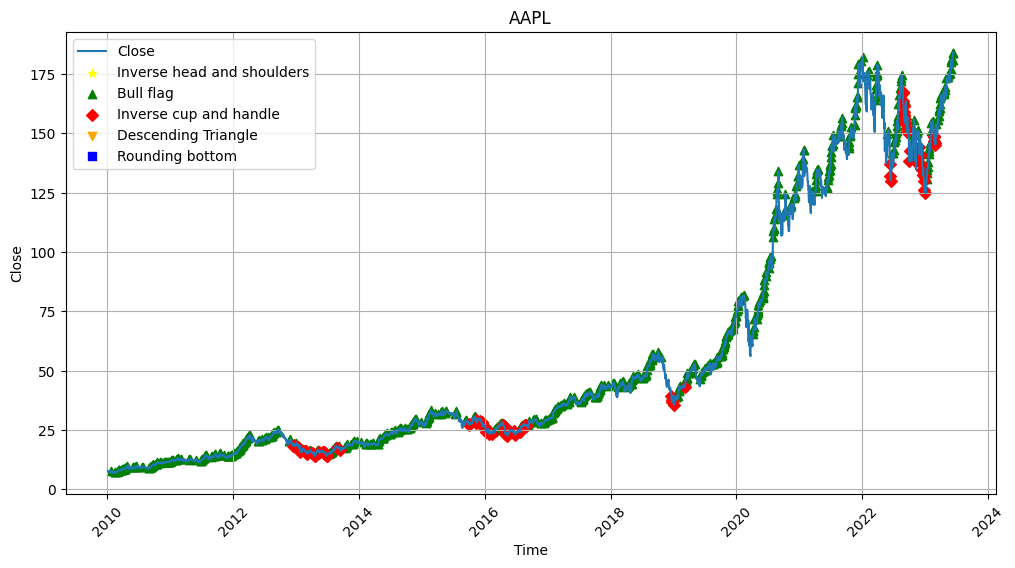

[*********************100%***********************]  1 of 1 completed


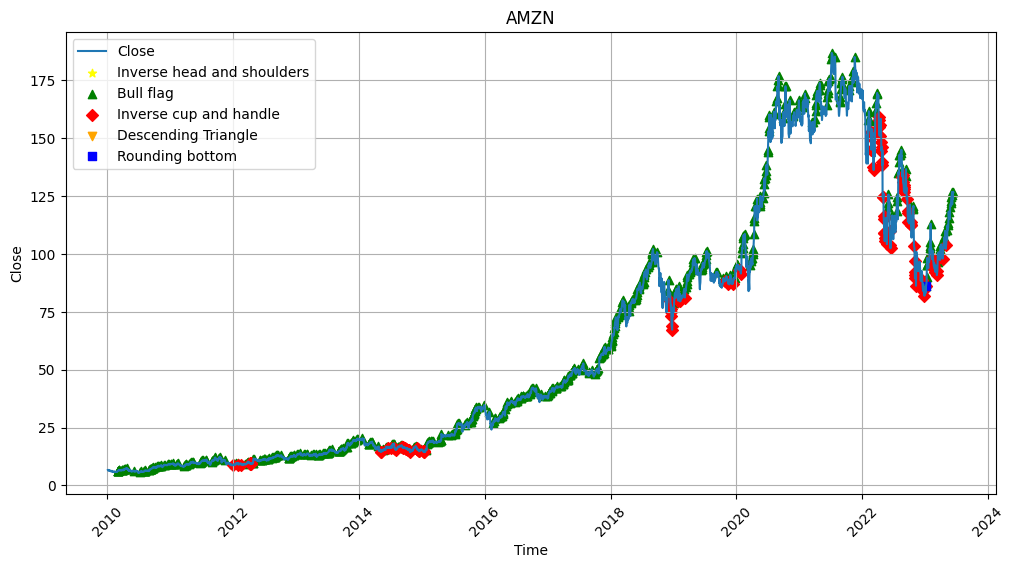

[*********************100%***********************]  1 of 1 completed


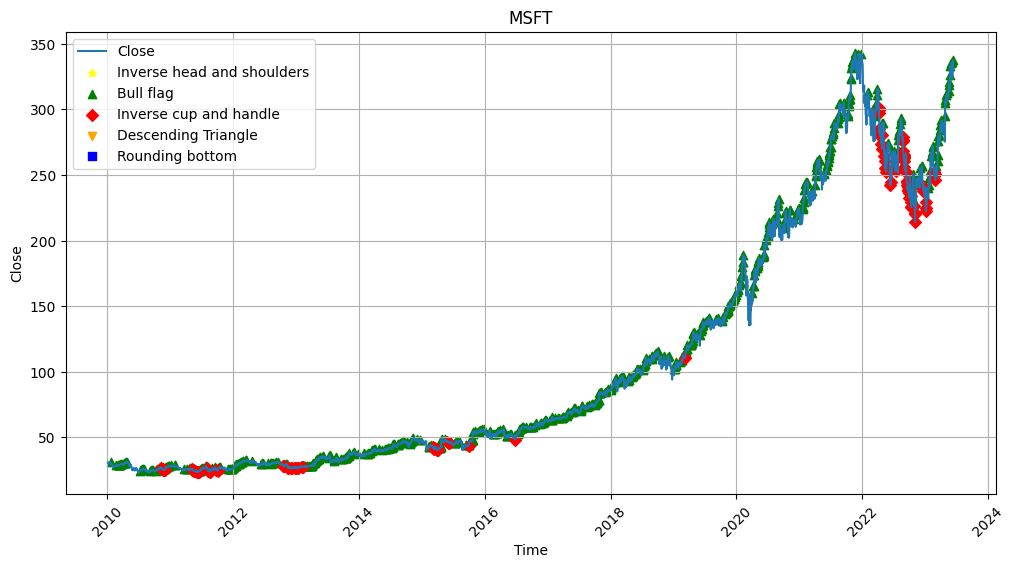

[*********************100%***********************]  1 of 1 completed


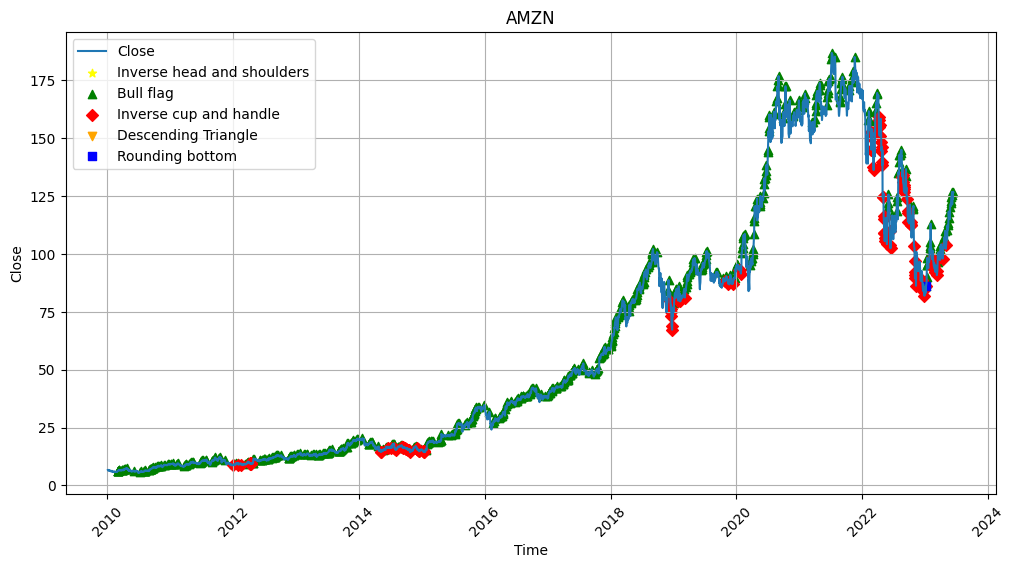

[*********************100%***********************]  1 of 1 completed


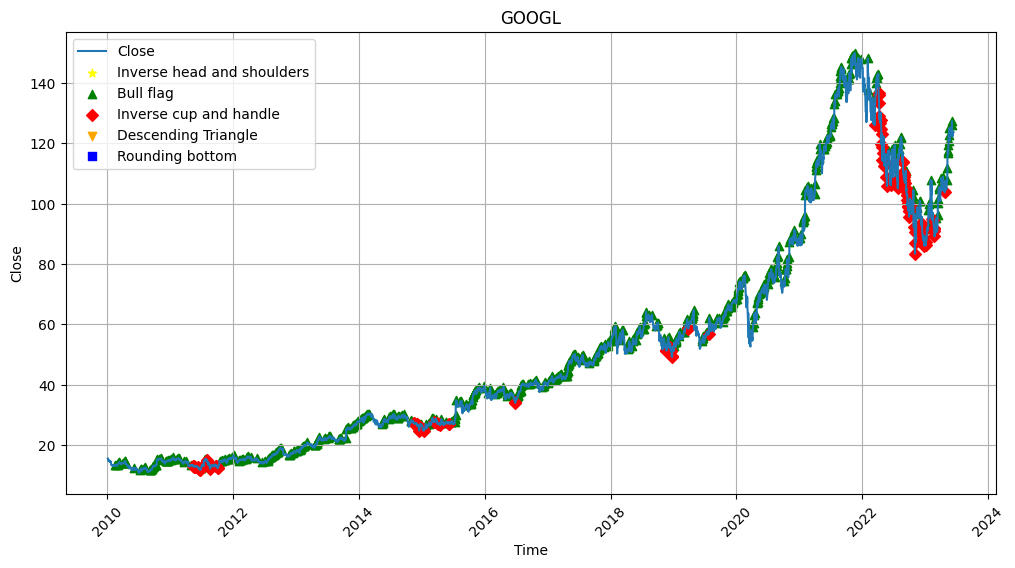

[*********************100%***********************]  1 of 1 completed


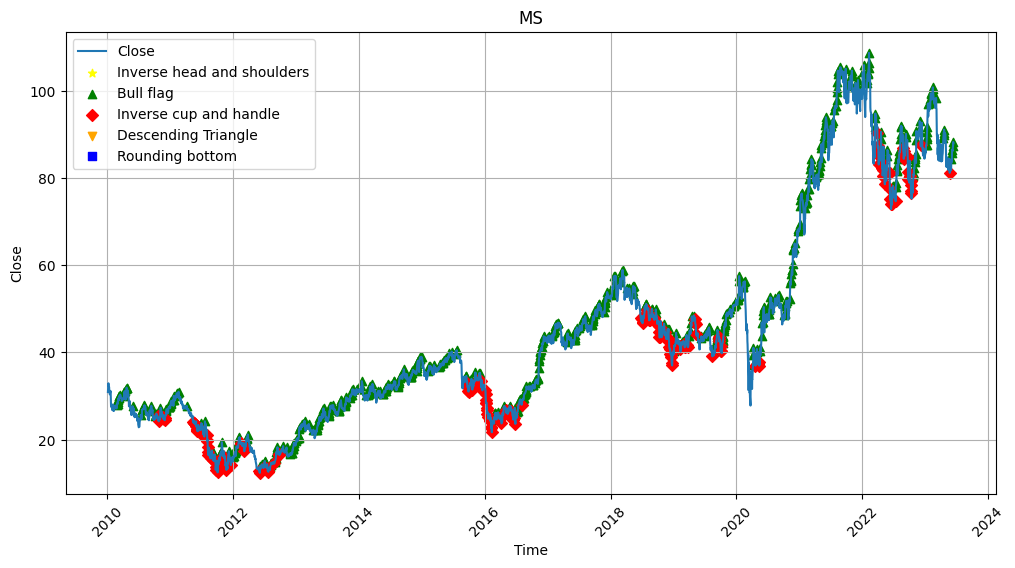

[*********************100%***********************]  1 of 1 completed


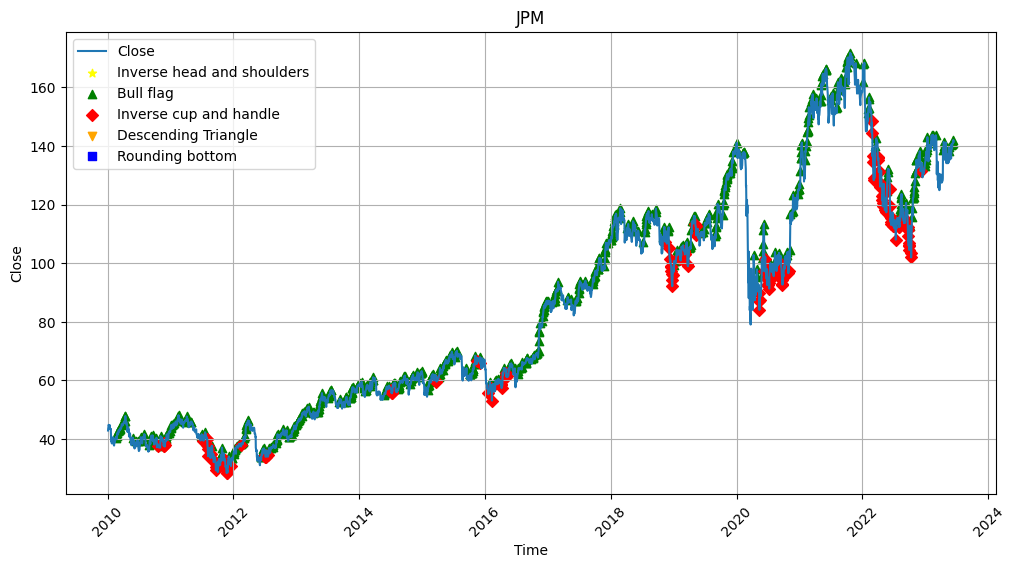

[*********************100%***********************]  1 of 1 completed


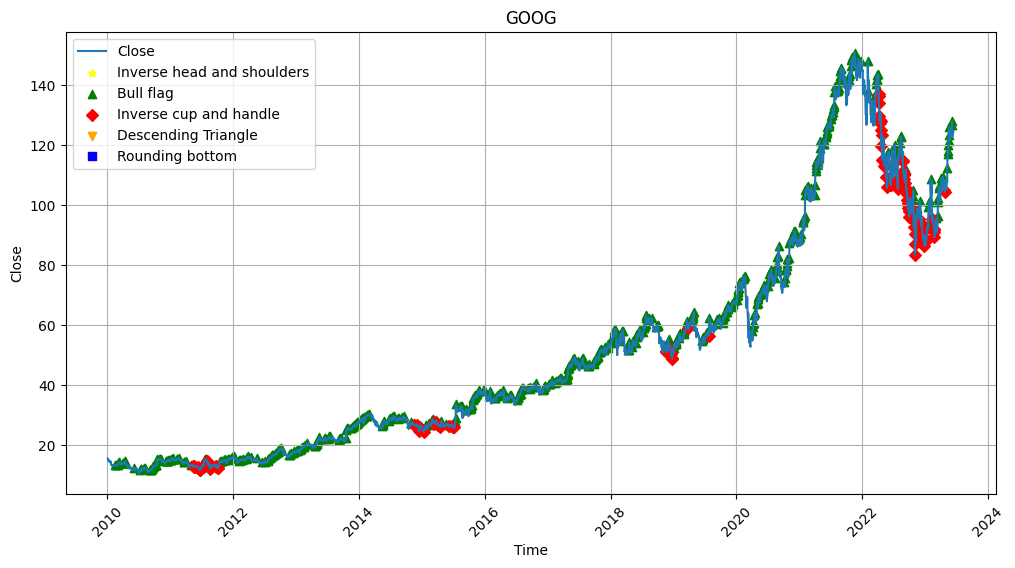

[*********************100%***********************]  1 of 1 completed


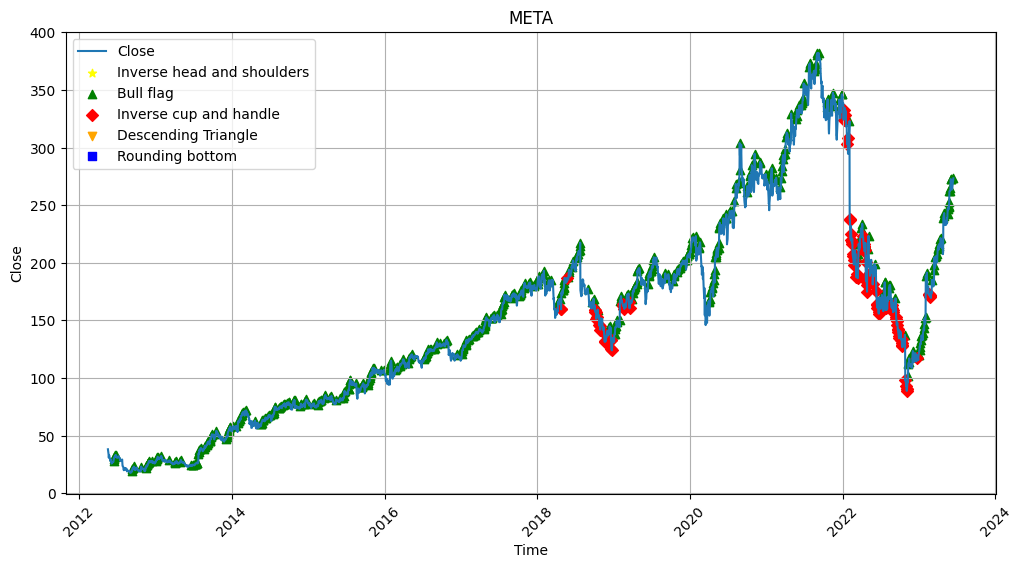

In [29]:
for ticker in indicies:
    data=yf.download(ticker, start='2010-01-01', end='2023-06-15')
    # Moving average calculation
    data['SMA_50'] = data['Close'].rolling(window=50).mean()
    data['SMA_200'] = data['Close'].rolling(window=200).mean()
    # Pattern detection
    data['Desc_T'] = ((data['High'].rolling(window=30).max() == data['High']) & (data['Low'].rolling(window=30).min().shift(1) == data['Low'])).astype(int)

    data['B_F'] = ((data['Close'].rolling(window=10).max() == data['Close'])).astype(int)

    data['I_N_C'] = ((data['Low'].rolling(window=10).min() == data['Low']) & (data['SMA_50'] < data['SMA_200'])).astype(int)

    data['R_B'] = ((data['Low'].rolling(window=30).min() == data['Low']) & (data['Close'].rolling(window=10).max() == data['Close'])).astype(int)

    data['I_H_S'] = ((data['Low'].rolling(window=30).min() == data['Low']) & (data['Close'].rolling(window=10).max() == data['Close'])).astype(int)

    # STOCK CHART
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['Close'], label='Close')

    # PATTERN MARKERS
    plt.scatter(data[data['I_H_S'] == 1].index, data[data['I_H_S'] == 1]['Close'], marker='*', color='yellow', label='Inverse head and shoulders')
    plt.scatter(data[data['B_F'] == 1].index, data[data['B_F'] == 1]['Close'], marker='^', color='green', label='Bull flag')
    plt.scatter(data[data['I_N_C'] == 1].index, data[data['I_N_C'] == 1]['Close'], marker='D', color='red', label='Inverse cup and handle')
    plt.scatter(data[data['Desc_T'] == 1].index, data[data['Desc_T'] == 1]['Close'], marker='v', color='orange', label='Descending Triangle')
    plt.scatter(data[data['R_B'] == 1].index, data[data['R_B'] == 1]['Close'], marker='s', color='blue', label='Rounding bottom')
    plt.title(ticker)
    plt.xlabel('Time')
    plt.ylabel('Close')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()
